## Time Series Analysis Models - LSTM

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input, Conv1D, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam

In [2]:
class DataProcessing:
    def __init__(self, ticker, period= 'max', target= 'Close', scaler= None, test_size= 0.2):
        self.ticker = ticker
        self.period = period
        self.target = target
        self.scaler = scaler
        self.test_size = test_size
        self.raw_data = None
        self.target_data = None
        self.scaled_data = None
        self.train_data = None
        self.test_data = None
        self.fetch_data()
        self.preprocess_data()
        self.extract_target_data()
        self.split_data()

    def fetch_data(self, period= None):
        if period is None:
            period = self.period
        data = yf.Ticker(self.ticker)
        try:
            self.raw_data = data.history(period= period)
            if self.raw_data is None or self.raw_data.empty:
                print('Error: No data available for ticker for the specified period.')
        except Exception as e:
            print('Error: Invalid ticker.')
        
    def extract_target_data(self):
        if self.raw_data is not None:
            self.target_data = pd.DataFrame(self.raw_data[self.target])
        else:
            print('Error: Data not available.')

    def preprocess_data(self):
        if self.raw_data is not None:
            if self.scaler is not None:
                self.scaled_data = self.scaler.fit_transform(self.raw_data[[self.target]])
            else:
                print('Warning: Scaler was not provided. MinMaxScaler was used.')
                self.scaler = MinMaxScaler(feature_range= (0, 1))
                self.scaled_data = self.scaler.fit_transform(self.raw_data[[self.target]])
        else:
            print('Error: Data not available.')

    def split_data(self):
        # Check if scaled_data is available
        if self.scaled_data is not None:
            # Split data into train and test sets
            self.train_data, self.test_data = train_test_split(self.scaled_data, test_size= self.test_size, shuffle= False)
        else:
            print('Error: Scaled data not available.')

In [3]:
ticker = 'GOOG'
period = 'max'
target = 'Close'
scaler = MinMaxScaler(feature_range=(0, 1))
test_size = 0.2

scaled_data = DataProcessing(ticker= ticker, period= period, target= target, scaler= scaler, test_size= test_size)

In [4]:
scaled_data.raw_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.490664,2.591785,2.390042,2.499133,897427216,0.0,0.0
2004-08-20 00:00:00-04:00,2.515820,2.716817,2.503118,2.697639,458857488,0.0,0.0
2004-08-23 00:00:00-04:00,2.758411,2.826406,2.716070,2.724787,366857939,0.0,0.0
2004-08-24 00:00:00-04:00,2.770615,2.779581,2.579581,2.611960,306396159,0.0,0.0
2004-08-25 00:00:00-04:00,2.614201,2.689918,2.587302,2.640104,184645512,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-29 00:00:00-05:00,138.985001,139.669998,136.294998,136.399994,21014700,0.0,0.0
2023-11-30 00:00:00-05:00,136.399994,136.960007,132.789993,133.919998,29913500,0.0,0.0
2023-12-01 00:00:00-05:00,133.320007,133.500000,132.151993,133.320007,24258400,0.0,0.0


In [5]:
scaled_data.target_data

,Close
Date,
2004-08-19 00:00:00-04:00,2.499133
2004-08-20 00:00:00-04:00,2.697639
2004-08-23 00:00:00-04:00,2.724787
2004-08-24 00:00:00-04:00,2.611960
2004-08-25 00:00:00-04:00,2.640104
...,...
2023-11-29 00:00:00-05:00,136.399994
2023-11-30 00:00:00-05:00,133.919998
2023-12-01 00:00:00-05:00,133.320007


In [6]:
scaled_data.train_data

array([[5.54601395e-05],
       [1.39474256e-03],
       [1.57790515e-03],
       ...,
       [4.84701870e-01],
       [4.77975335e-01],
       [4.66907166e-01]])

In [7]:
scaled_data.test_data

array([[0.47320194],
       [0.47524963],
       [0.47430842],
       [0.4670185 ],
       [0.48446236],
       [0.47134995],
       [0.47174125],
       [0.48118681],
       [0.48219884],
       [0.4921335 ],
       [0.49217061],
       [0.49536859],
       [0.49415082],
       [0.49620186],
       [0.49584087],
       [0.49820904],
       [0.49532813],
       [0.48418239],
       [0.46275449],
       [0.45157503],
       [0.45317063],
       [0.42783976],
       [0.43500485],
       [0.45179766],
       [0.4356998 ],
       [0.45092394],
       [0.42816023],
       [0.42120088],
       [0.39325219],
       [0.41512199],
       [0.39320159],
       [0.35929883],
       [0.3946589 ],
       [0.34898296],
       [0.36094845],
       [0.3531896 ],
       [0.35942703],
       [0.34493151],
       [0.33963526],
       [0.36589385],
       [0.35510907],
       [0.37509989],
       [0.35788201],
       [0.37006338],
       [0.37545746],
       [0.35616494],
       [0.36129927],
       [0.353

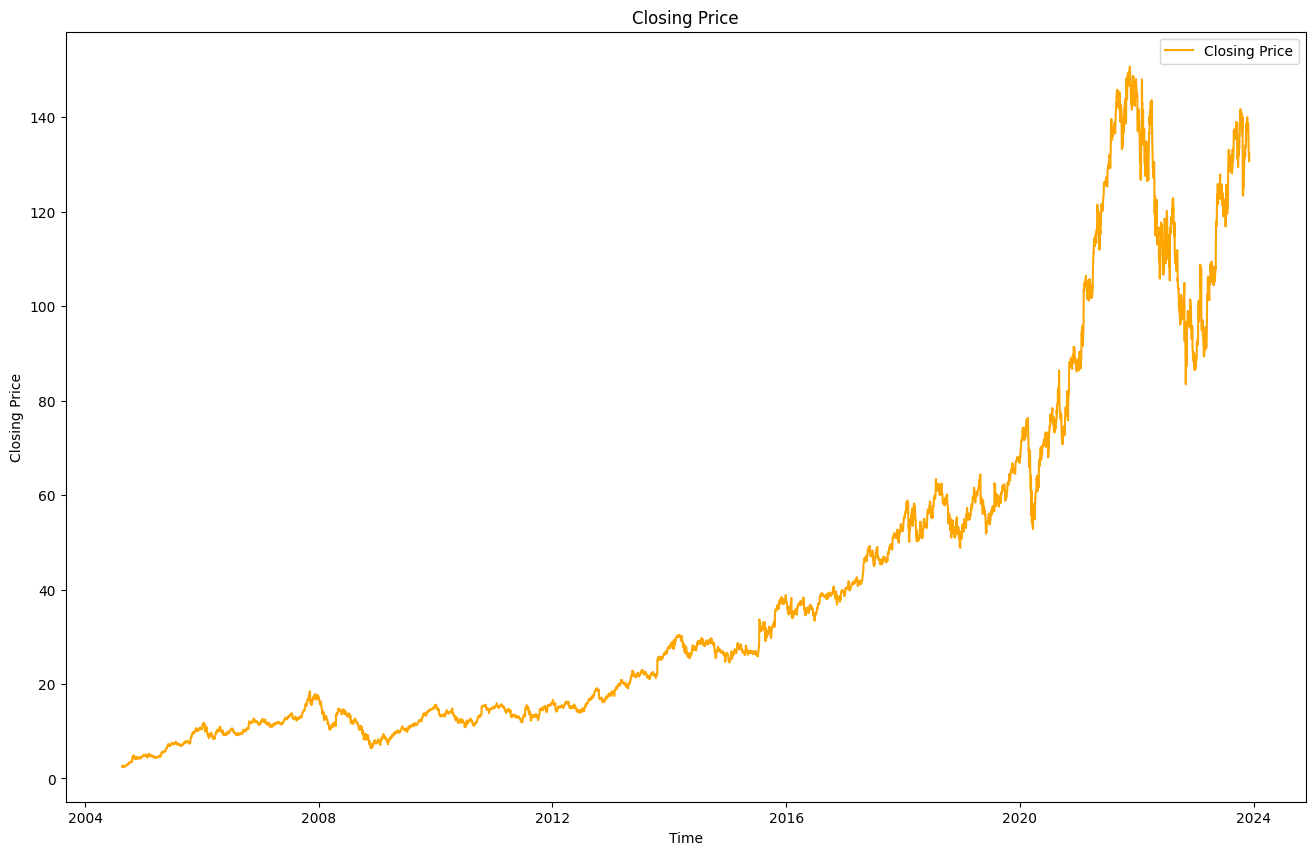

In [8]:
plt.figure(figsize= (16,10))
plt.title('Closing Price')
plt.plot(scaled_data.target_data, color= 'orange', label= 'Closing Price')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [9]:
train = scaled_data.train_data
test = scaled_data.test_data

In [10]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [11]:
seq_length = 14

X_train, y_train = create_sequences(train, seq_length)
X_test, y_test = create_sequences(test, seq_length)

### LSTM Model

In [12]:
model_lstm = Sequential()
model_lstm.add(LSTM(128, return_sequences= True, input_shape= (X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(64, return_sequences= True))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1))

model_lstm.compile(loss= 'mean_squared_error', optimizer= Adam(learning_rate= 0.001), metrics= 'mape')

start_time_lstm = time.time()
model_lstm.fit(X_train, y_train, epochs= 100, batch_size= 32, validation_split= 0.1)
end_time_lstm = time.time()
training_time_lstm = end_time_lstm - start_time_lstm


Epoch 1/100


109/109 [==============================] - 12s 41ms/step - loss: 8.6774e-04 - mape: 19.5840 - val_loss: 1.7091e-04 - val_mape: 2.7270
Epoch 2/100
109/109 [==============================] - 3s 25ms/step - loss: 5.1393e-05 - mape: 5.8096 - val_loss: 3.3056e-04 - val_mape: 3.9427
Epoch 3/100
109/109 [==============================] - 3s 24ms/step - loss: 5.9424e-05 - mape: 6.4798 - val_loss: 1.8968e-04 - val_mape: 2.8546
Epoch 4/100
109/109 [==============================] - 3s 25ms/step - loss: 5.3240e-05 - mape: 6.3019 - val_loss: 1.6156e-04 - val_mape: 2.6387
Epoch 5/100
109/109 [==============================] - 3s 25ms/step - loss: 5.2795e-05 - mape: 6.2350 - val_loss: 1.8267e-04 - val_mape: 2.7981
Epoch 6/100
109/109 [==============================] - 3s 24ms/step - loss: 4.8077e-05 - mape: 5.8351 - val_loss: 1.6400e-04 - val_mape: 2.6521
Epoch 7/100
109/109 [==============================] - 3s 25ms/step - loss: 5.2746e-05 - mape: 6.3010 - val_loss: 1.5357e-04 - val_

### Transformer Model

In [13]:
X_train_transformer = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_transformer = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

def build_transformer_model(input_shape):
    inputs = Input(shape= input_shape)
    conv_output = Conv1D(filters= 64, kernel_size= 2, activation= 'relu')(inputs)
    attention_output = MultiHeadAttention(num_heads= 4, key_dim= 128)(conv_output, conv_output, conv_output)
    pooling_output = GlobalAveragePooling1D()(attention_output)
    dense_output = Dense(64, activation= 'relu')(pooling_output)
    dropout_output = Dropout(0.1)(dense_output)
    output = Dense(1)(dropout_output)
    model = Model(inputs=inputs, outputs=output)
    return model

input_shape = (seq_length, 1)
model_transformer = build_transformer_model(input_shape)

model_transformer.compile(loss= 'mean_squared_error', optimizer= Adam(learning_rate= 0.001), metrics= 'mape')

start_time_transformer = time.time()
model_transformer.fit(X_train_transformer, y_train, epochs= 100, batch_size= 32, validation_split= 0.1)
end_time_transformer = time.time()
training_time_transformer = end_time_transformer - start_time_transformer

Epoch 1/100
109/109 [==============================] - 4s 18ms/step - loss: 0.0010 - mape: 31.5695 - val_loss: 1.3683e-04 - val_mape: 2.4416
Epoch 2/100
109/109 [==============================] - 2s 16ms/step - loss: 1.7262e-04 - mape: 13.8940 - val_loss: 7.1476e-04 - val_mape: 6.2526
Epoch 3/100
109/109 [==============================] - 2s 19ms/step - loss: 1.7540e-04 - mape: 11.7022 - val_loss: 4.7212e-04 - val_mape: 4.9462
Epoch 4/100
109/109 [==============================] - 2s 16ms/step - loss: 1.8112e-04 - mape: 13.4371 - val_loss: 1.3342e-04 - val_mape: 2.3989
Epoch 5/100
109/109 [==============================] - 2s 17ms/step - loss: 1.5443e-04 - mape: 12.2080 - val_loss: 1.4247e-04 - val_mape: 2.5078
Epoch 6/100
109/109 [==============================] - 2s 18ms/step - loss: 1.3274e-04 - mape: 10.0222 - val_loss: 2.1618e-04 - val_mape: 3.0964
Epoch 7/100
109/109 [==============================] - 2s 19ms/step - loss: 1.3366e-04 - mape: 11.4855 - val_loss: 2.7961e-04 - val_ma

### Evaluation

In [14]:
y_pred_lstm = model_lstm.predict(X_test)
y_pred_inverse_lstm = scaler.inverse_transform(y_pred_lstm)

30/30 [==============================] - 2s 11ms/step


In [15]:
y_pred_transformer = model_transformer.predict(X_test)
y_pred_inverse_transformer = scaler.inverse_transform(y_pred_transformer)

30/30 [==============================] - 0s 6ms/step


In [16]:
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_df = y_test_inverse.flatten()

In [17]:
def find_mape(y_test, y_pred):
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    return mape

mape_lstm = find_mape(y_test_inverse, y_pred_inverse_lstm)
mape_transformer = find_mape(y_test_inverse, y_pred_inverse_transformer)

print('MAPE of LSTM:', mape_lstm)
print('MAPE of Transformer:', mape_transformer)

MAPE of LSTM: 4.457932235544907
MAPE of Transformer: 3.39259306860331


In [18]:
print('Training time for LSTM: {:.2f}s'.format(training_time_lstm))
print('Training time for Transformer: {:.2f}s'.format(training_time_transformer))

Training time for LSTM: 314.14s
Training time for Transformer: 184.06s


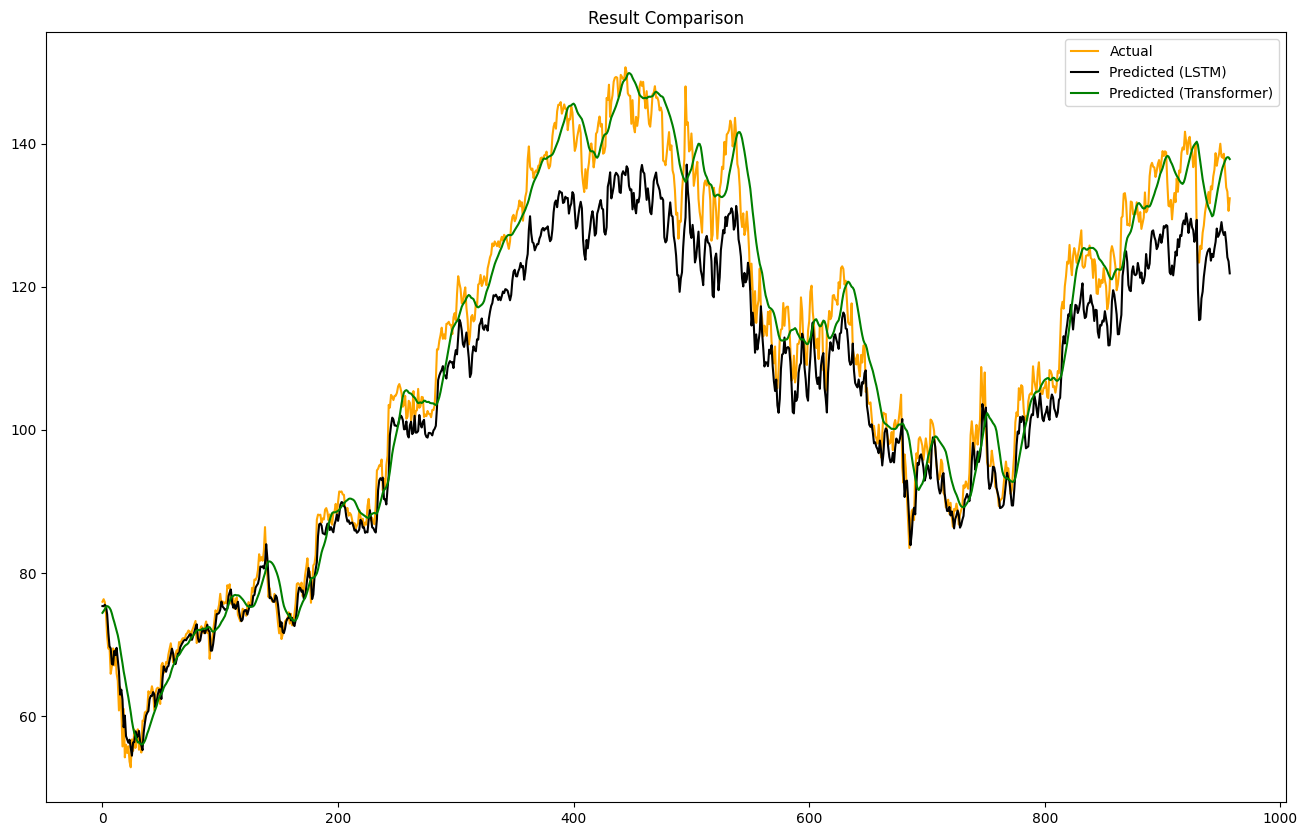

In [19]:
plt.figure(figsize= (16,10))
plt.title('Result Comparison')
plt.plot(y_test_inverse, color= 'orange', label= 'Actual')
plt.plot(y_pred_inverse_lstm, color= 'black', label= 'Predicted (LSTM)')
plt.plot(y_pred_inverse_transformer, color= 'green', label= 'Predicted (Transformer)')
plt.legend()
plt.show()

In [20]:
y_pred_df_lstm = y_pred_inverse_lstm.flatten()
y_pred_df_transformer = y_pred_inverse_transformer.flatten()
comparison = pd.DataFrame({'Test Data': y_test_df,
                                       'LSTM Result': y_pred_df_lstm,
                                       'Transformer Result': y_pred_df_transformer,
                                       'LSTM Difference': y_test_df - y_pred_df_lstm,
                                       'Transformer Difference': y_test_df - y_pred_df_transformer})
comparison

,Test Data,LSTM Result,Transformer Result,LSTM Difference,Transformer Difference
0,75.983498,75.370430,74.424385,0.613068,1.559113
1,76.334503,75.354813,74.671967,0.979691,1.662537
2,75.907501,75.554001,74.932068,0.353500,0.975433
3,74.255501,75.353706,75.237717,-1.098206,-0.982216
4,71.079498,74.192467,75.362579,-3.112968,-4.283081
...,...,...,...,...,...
953,136.399994,127.683144,137.617706,8.716850,-1.217712
954,133.919998,126.180084,138.002182,7.739914,-4.082184
955,133.320007,124.134033,138.134964,9.185974,-4.814957
956,130.630005,123.570839,138.115494,7.059166,-7.485489
